In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import matplotlib.patches as patches
from matplotlib.offsetbox import AnchoredText
import sys
sys.path.append('/home/yaolinm/Projects/Florence/funcs/')
from dbf import *

In [2]:
pws_stacked=np.load('/scratch/zspica_root/zspica0/yaolinm/Florence/stacked_xcorr2/pws/1200.npy')
pws_stacked.shape

(181, 1200)

([<matplotlib.axis.YTick at 0x146faaebb040>,
 [Text(0, 0, 'Ch.2300'),
  Text(0, 60, 'Ch.2150'),
  Text(0, 120, 'Ch.2000'),
  Text(0, 180, 'Ch.1850'),
  Text(0, 240, 'Ch.1700'),
  Text(0, 300, 'Ch.1550'),
  Text(0, 362, 'Ch.1400')])

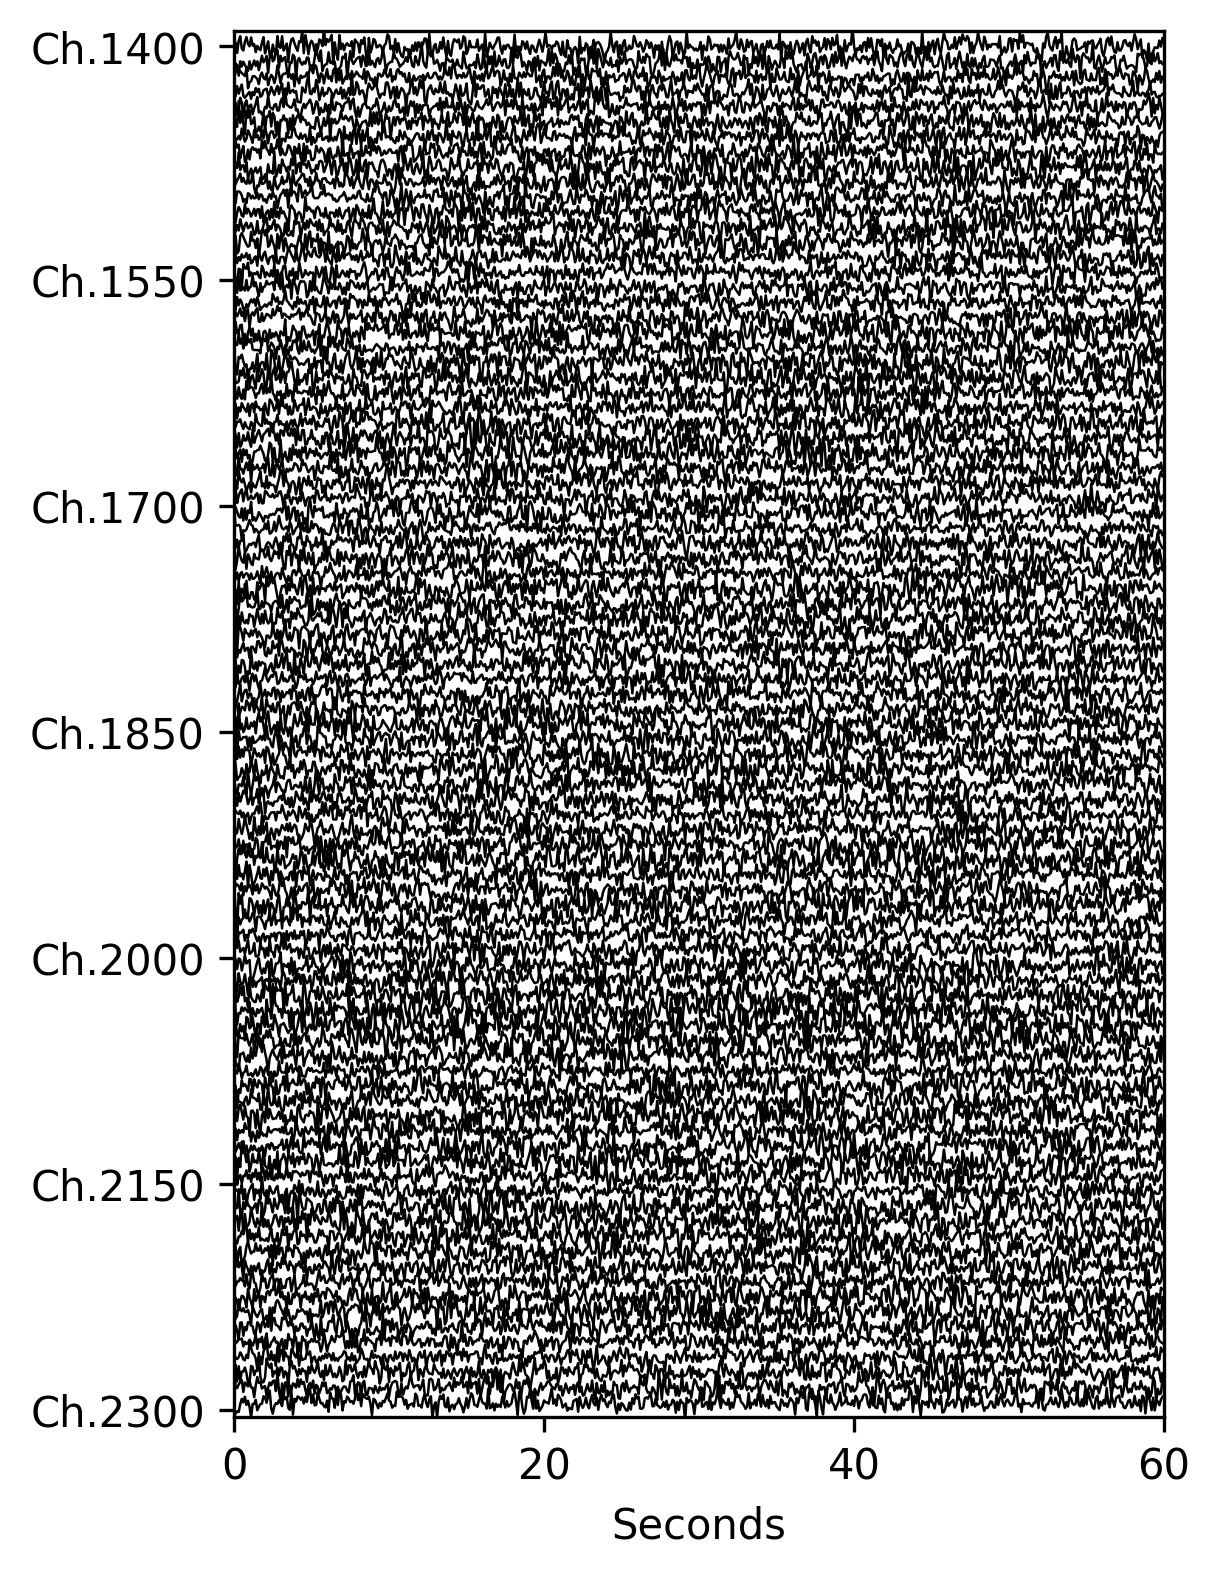

In [17]:
single=np.load('/scratch/zspica_root/zspica0/yaolinm/Florence/xcorr2/1200/2021-08-06T00.00.53.08_10_min.npy')
single.shape

fig=plt.figure(figsize=(4,6),dpi=300)

for i in range(0,len(single),2):
    
    plt.plot(5*(single[i,:]/np.max(np.abs(single[i,640:])))+(len(single)-i)*2,c='k',lw=0.6)
    
plt.xlim(600,1200)
plt.ylim(-2,366)
plt.xticks([600,800,1000,1200],[0,20,40,60])
plt.xlabel('Seconds')
plt.yticks([0,60,120,180,240,300,362],['Ch.2300','Ch.2150','Ch.2000','Ch.1850','Ch.1700','Ch.1550','Ch.1400'])


In [3]:
sampling_rate=10
frange=np.linspace(0.1,3,100)
bandwidth=0.1
filtered=np.zeros((100,pws_stacked.shape[0],pws_stacked.shape[1]))
for i in range(len(pws_stacked)):
    filtered[:,i,:]=multi_filter_1d(pws_stacked[i,:],sampling_rate,frange,bandwidth)

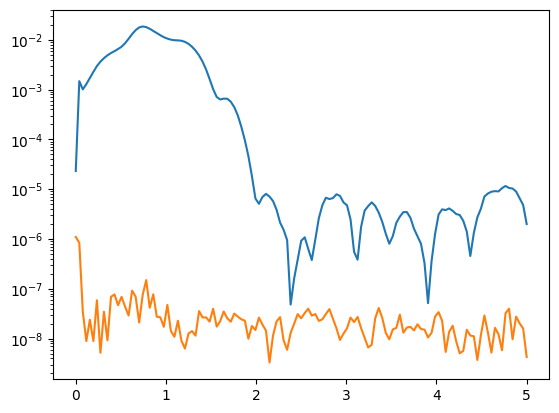

In [4]:
f, Pxx_den = signal.welch(pws_stacked[0,640:], 10)
f, Pxx_den2 = signal.welch(pws_stacked[0,:560], 10)
plt.semilogy(f, Pxx_den)
plt.semilogy(f, Pxx_den2)

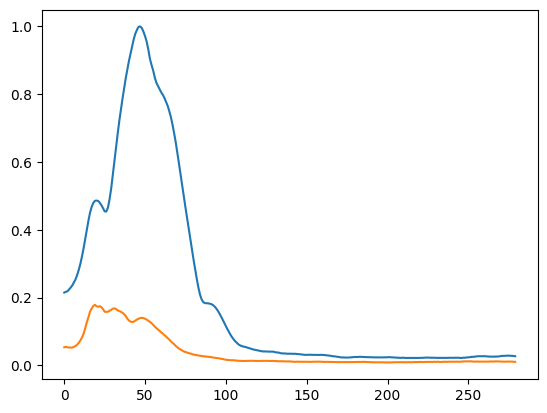

In [10]:
casual_spectrum=np.abs(np.fft.fft(pws_stacked[0,640:]))[:280]
anticasual_spectrum=np.abs(np.fft.fft(pws_stacked[0,:560]))[:280]
for i in range(1,181):
    casual_spectrum+=np.abs(np.fft.fft(pws_stacked[i,640:]))[:280]
    anticasual_spectrum+=np.abs(np.fft.fft(pws_stacked[i,:560]))[:280]
plt.plot(casual_spectrum/np.max(casual_spectrum))
plt.plot(anticasual_spectrum/np.max(casual_spectrum))

([<matplotlib.axis.YTick at 0x146faaf5e1a0>,
 [Text(0, 0, 'Ch.2300'),
  Text(0, 60, 'Ch.2150'),
  Text(0, 120, 'Ch.2000'),
  Text(0, 180, 'Ch.1850'),
  Text(0, 240, 'Ch.1700'),
  Text(0, 300, 'Ch.1550'),
  Text(0, 362, 'Ch.1400')])

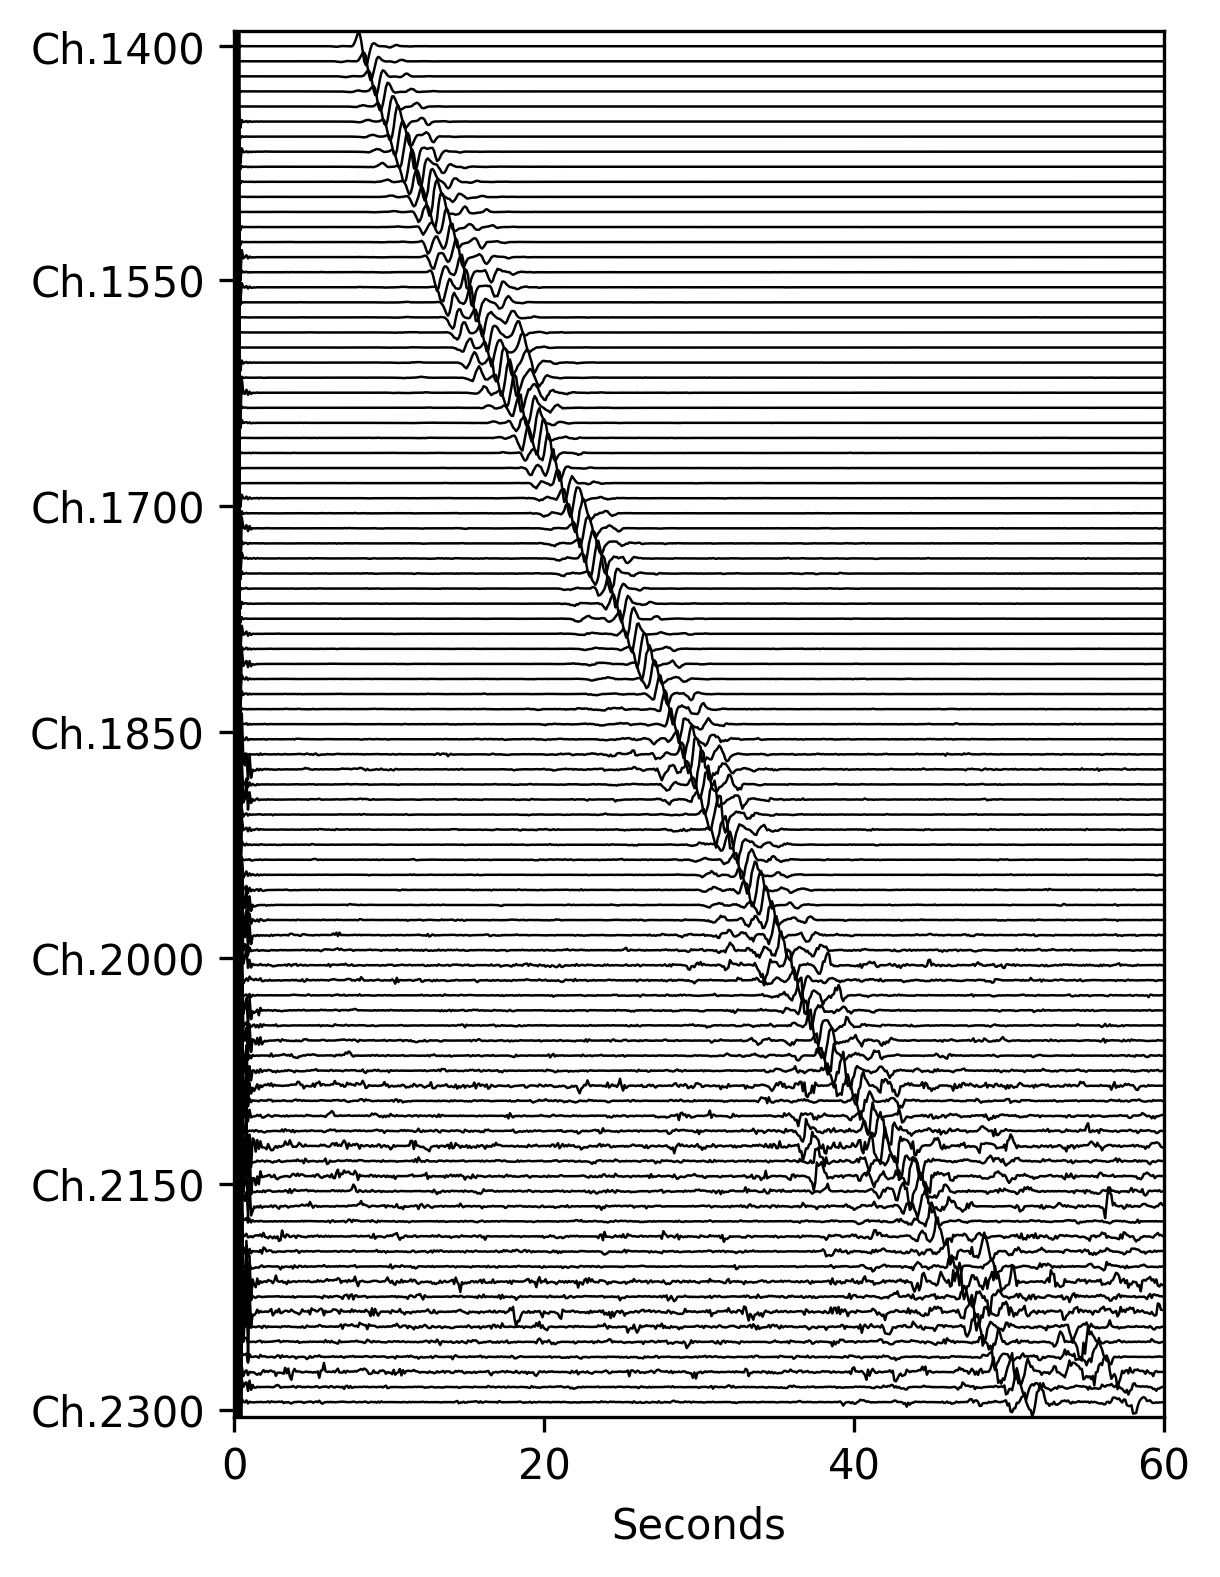

In [15]:
fig=plt.figure(figsize=(4,6),dpi=300)

for i in range(0,len(pws_stacked),2):
    
    plt.plot(5*(pws_stacked[i,:]/np.max(np.abs(pws_stacked[i,640:])))+(len(pws_stacked)-i)*2,c='k',lw=0.6)
    
plt.xlim(600,1200)
plt.ylim(-2,366)
plt.xticks([600,800,1000,1200],[0,20,40,60])
plt.xlabel('Seconds')
plt.yticks([0,60,120,180,240,300,362],['Ch.2300','Ch.2150','Ch.2000','Ch.1850','Ch.1700','Ch.1550','Ch.1400'])


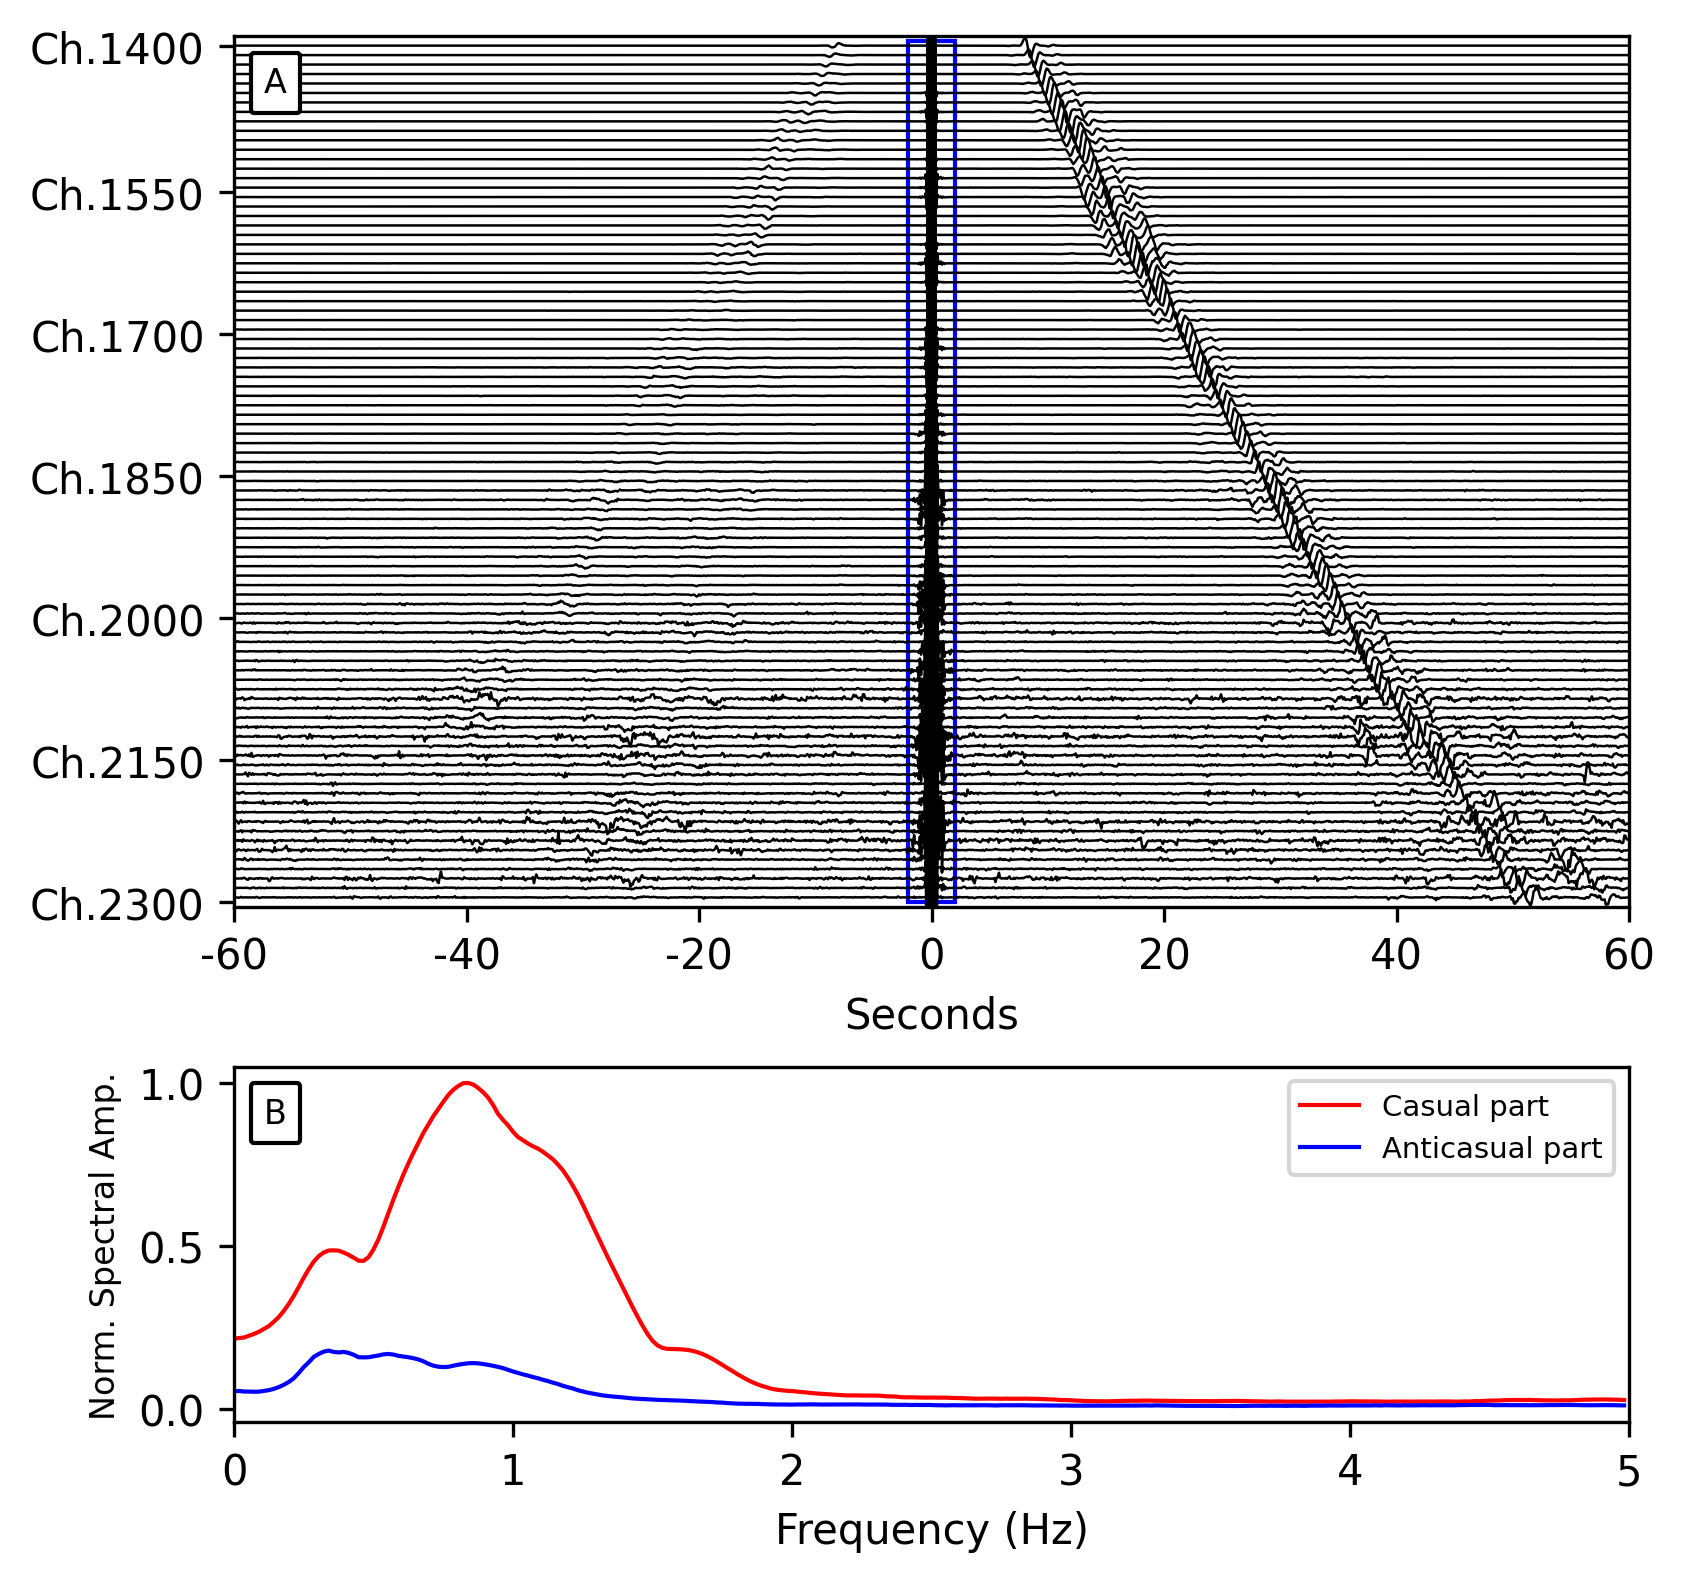

In [9]:
# fig,(ax1,ax2)=plt.subplots(1,2,gridspec_kw={'width_ratios': [3, 1]},dpi=300)

fig=plt.figure(figsize=(6,6),dpi=300)
fig.subplots_adjust(hspace=0.45,wspace=0.1)

ax1=plt.subplot2grid(shape=(3,2),loc=(0,0),colspan=2,rowspan=2)
# ax2=plt.subplot2grid(shape=(3,3),loc=(0,2),colspan=1,rowspan=2)
ax3=plt.subplot2grid(shape=(3,2),loc=(2,0),colspan=2,rowspan=1)

for i in range(0,len(pws_stacked),2):
    
    ax1.plot(5*(pws_stacked[i,:]/np.max(np.abs(pws_stacked[i,640:])))+(len(pws_stacked)-i)*2,c='k',lw=0.6)
#     ax1.plot(5*(pws_stacked[i,:]/np.max(np.abs(pws_stacked[i,:])))+(len(pws_stacked)-i)*2,c='k',lw=0.6)
    
ax1.set_xlim(0,1200)
ax1.set_ylim(-2,366)
ax1.set_xticks([0,200,400,600,800,1000,1200])
ax1.set_xticklabels([-60,-40,-20,0,20,40,60])
ax1.set_xlabel('Seconds')
ax1.set_yticks([0,60,120,180,240,300,362])
ax1.set_yticklabels(['Ch.2300','Ch.2150','Ch.2000','Ch.1850','Ch.1700','Ch.1550','Ch.1400'])

rect = patches.Rectangle((580,0),40,364, linewidth=1, edgecolor='b', facecolor='none',clip_on=False)
ax1.add_patch(rect)

# rect = patches.Rectangle((640,0),565,364, linewidth=1, edgecolor='r', facecolor='none',clip_on=False)
# ax1.add_patch(rect)

at = AnchoredText('A',prop=dict(size=8), frameon=True,loc=2,)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.1)
ax1.add_artist(at)


# for i in range(0,len(pws_stacked),2):
    
#     ax2.plot(5*(pws_stacked[i,640:]/np.max(np.abs(pws_stacked[i,640:])))+(len(pws_stacked)-i)*2,c='k',lw=0.6)
    
# ax2.set_xlim(0,550)
# ax2.set_ylim(-2,366)
# ax2.set_xticks([0,160,360,560])
# ax2.set_xticklabels([4,20,40,60])
# ax2.set_xlabel('Seconds')
# ax2.set_yticks([0,60,120,180,240,300,360])
# ax2.set_yticklabels(['','','','','','',''])

# at = AnchoredText('B',prop=dict(size=8), frameon=True,loc=1,)
# at.patch.set_boxstyle('round',pad=0,rounding_size=0.1)
# ax2.add_artist(at)

freqs=np.fft.fftfreq(560,1/10)[:280]
ax3.plot(freqs,casual_spectrum/np.max(casual_spectrum),lw=1,c='r',label='Casual part')
ax3.plot(freqs,anticasual_spectrum/np.max(casual_spectrum),lw=1,c='b',label='Anticasual part')
ax3.set_xlim(0,5)
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('Norm. Spectral Amp.',fontsize=8)
ax3.legend(fontsize=7)

at = AnchoredText('B',prop=dict(size=8), frameon=True,loc=2,)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.1)
ax3.add_artist(at)

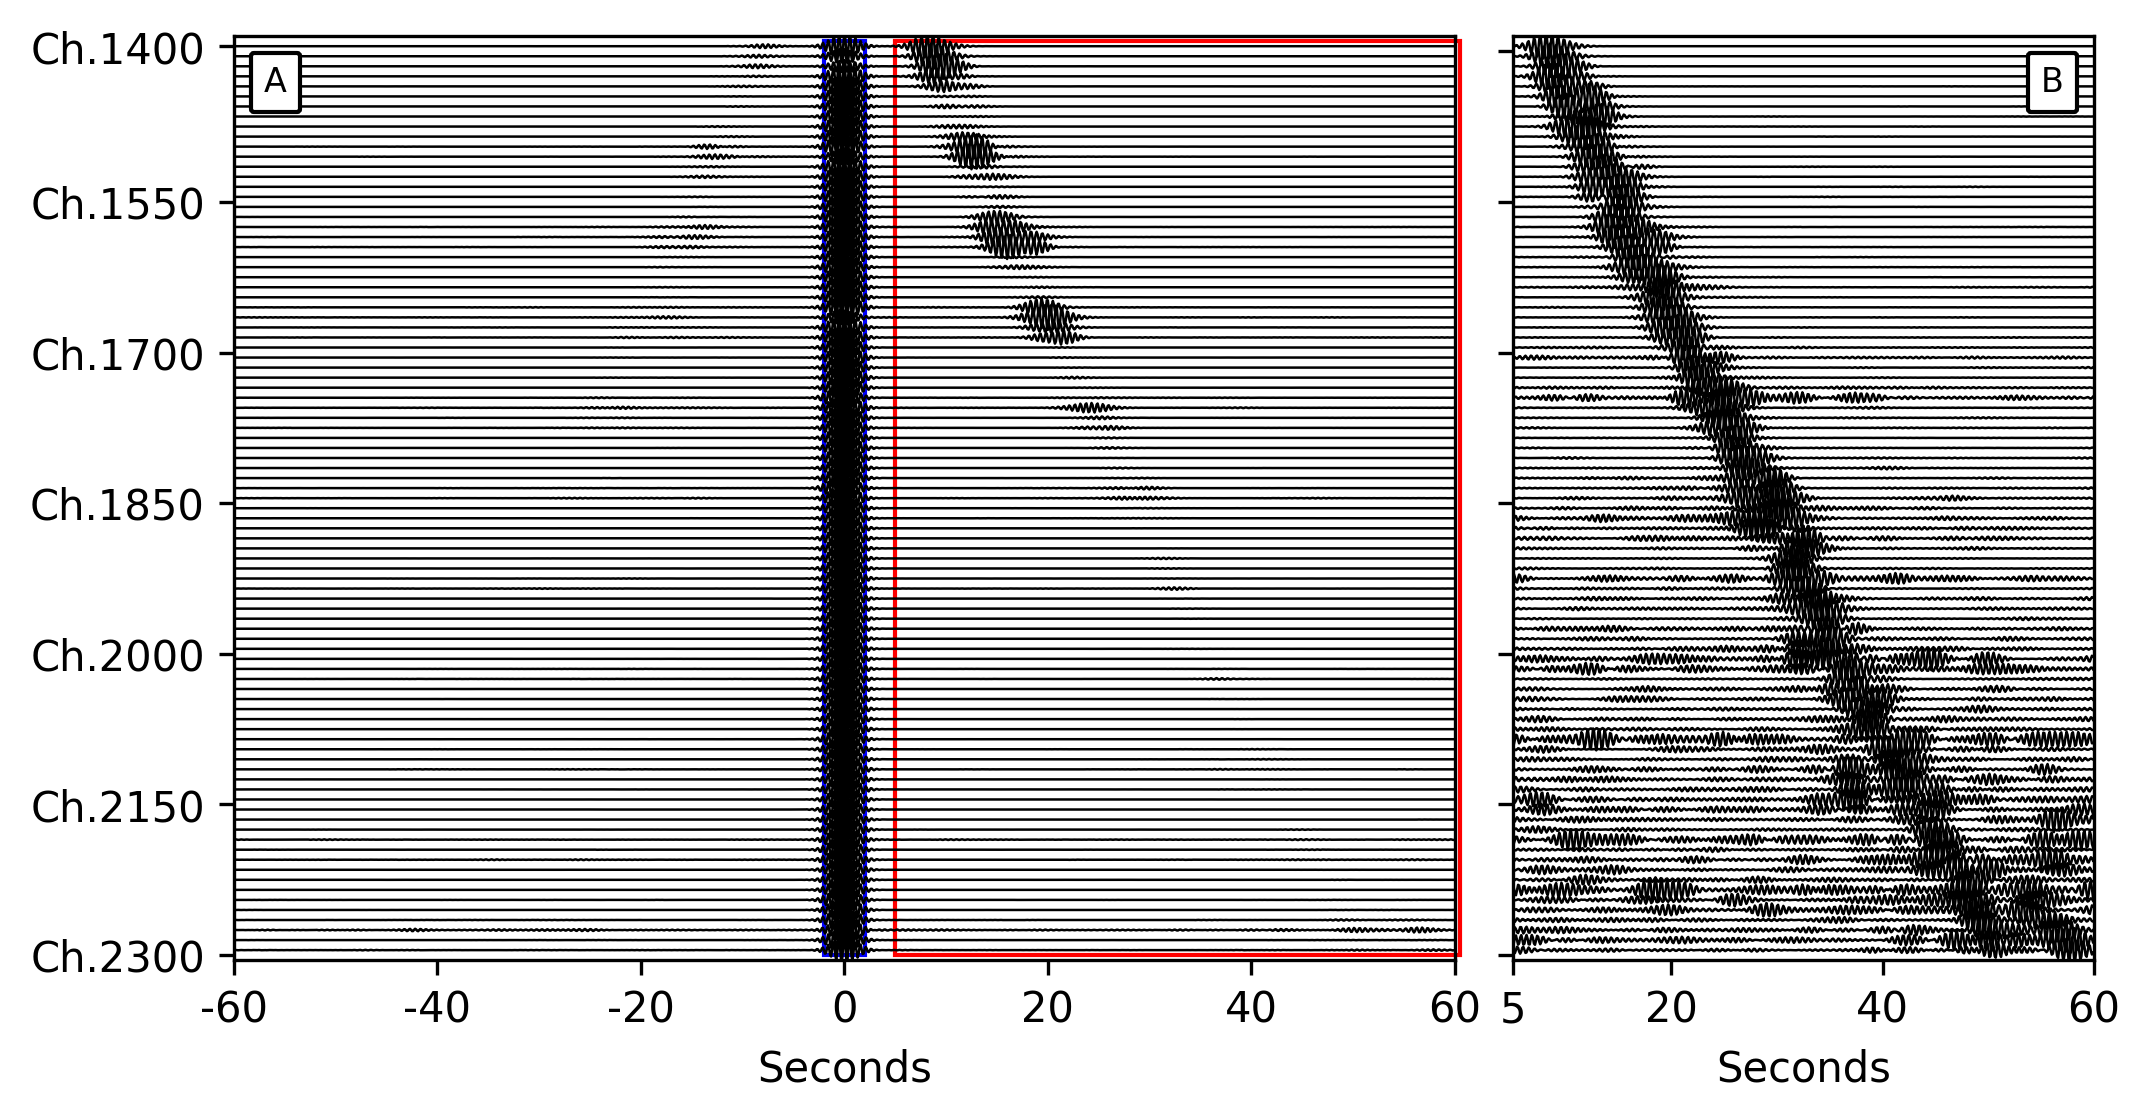

In [62]:
# fig,(ax1,ax2)=plt.subplots(1,2,gridspec_kw={'width_ratios': [3, 1]},dpi=300)

fig=plt.figure(figsize=(8,4),dpi=300)
fig.subplots_adjust(hspace=0,wspace=0.1)

ax1=plt.subplot2grid(shape=(1,3),loc=(0,0),colspan=2,rowspan=1)
ax2=plt.subplot2grid(shape=(1,3),loc=(0,2),colspan=1,rowspan=1)

freq=60
for i in range(0,len(pws_stacked),2):
    
    ax1.plot(5*(filtered[freq,i,:]/np.max(np.abs(filtered[freq,i,:])))+(len(pws_stacked)-i)*2,c='k',lw=0.6)
    
ax1.set_xlim(0,1200)
ax1.set_ylim(-2,366)
ax1.set_xticks([0,200,400,600,800,1000,1200])
ax1.set_xticklabels([-60,-40,-20,0,20,40,60])
ax1.set_xlabel('Seconds')
ax1.set_yticks([0,60,120,180,240,300,362])
ax1.set_yticklabels(['Ch.2300','Ch.2150','Ch.2000','Ch.1850','Ch.1700','Ch.1550','Ch.1400'])

rect = patches.Rectangle((580,0),40,364, linewidth=1, edgecolor='b', facecolor='none',clip_on=False)
ax1.add_patch(rect)

rect = patches.Rectangle((650,0),555,364, linewidth=1, edgecolor='r', facecolor='none',clip_on=False)
ax1.add_patch(rect)

at = AnchoredText('A',prop=dict(size=8), frameon=True,loc=2,)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.1)
ax1.add_artist(at)


for i in range(0,len(pws_stacked),2):
    
    ax2.plot(5*(filtered[freq,i,650:]/np.max(np.abs(filtered[freq,i,650:])))+(len(pws_stacked)-i)*2,c='k',lw=0.6)
    
ax2.set_xlim(0,550)
ax2.set_ylim(-2,366)
ax2.set_xticks([0,150,350,550])
ax2.set_xticklabels([5,20,40,60])
ax2.set_xlabel('Seconds')
ax2.set_yticks([0,60,120,180,240,300,360])
ax2.set_yticklabels(['','','','','','',''])

at = AnchoredText('B',prop=dict(size=8), frameon=True,loc=1,)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.1)
ax2.add_artist(at)